# DataCamp - Extreme Gradient Boosting with XGBoost (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Extreme Gradient Boosting with XGBoost/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import warnings
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import cross_val_score

from sklearn_pandas import DataFrameMapper, CategoricalImputer


this course in text: https://www.datacamp.com/community/tutorials/xgboost-in-python

see also: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

##    CHAPTER 1  - Classification with XGBoost


#### Exercício 1 - welcome

In [4]:
#vídeo

Exercício 2

In [5]:
# Which of these is a classification problem?
# Answer: Predicting whether a given user will click on an ad given the ad content and metadata associated with the user.

Exercício 3

In [6]:
# Which of these is a binary classification problem?
# Answer: Predicting whether a given image contains a cat.

#### Exercício 4 - Introducing XGBoost

In [7]:
#vídeo

Exercício 5

In [8]:
# XGBoost: Fit/Predict

churn_data = pd.read_csv(data_folder + 'churn_data.csv')  # arranjei uma diferente na net, mas parecida
churn_data = pd.get_dummies(data=churn_data, columns=['city', 'phone'])
churn_data[['last_trip_date','signup_date']] = churn_data[['last_trip_date','signup_date']].apply(
                                                 pd.to_datetime, errors='coerce')
# 5 months = 30*5 = 150 days
churn_data['month_5_still_here'] = (churn_data['last_trip_date'] - churn_data['signup_date']) >= '150 days'
churn_data['month_5_still_here'] = churn_data['month_5_still_here'].replace(True, 1).replace(False, 0).astype(int)
# other data cleaning
churn_data['luxury_car_user'] = churn_data['luxury_car_user'].replace(True, 1).replace(False, 0).astype(int)
#######################

# Import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Create arrays for the features and the target: X, y
X = churn_data.drop(['last_trip_date', 'signup_date', 'month_5_still_here'], axis=1)
y = churn_data['month_5_still_here']

# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy:", (accuracy))
churn_data.head(10)

accuracy: 0.7825


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,month_5_still_here
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,1,0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,0,1,0,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,1,1,0,0
5,10.56,5.0,3.5,1.00,2014-06-06,2014-01-09,0.0,2,1,100.0,0,0,1,0,1,0
6,3.95,4.0,NaN,1.00,2014-01-25,2014-01-24,0.0,1,0,100.0,1,0,0,1,0,0
7,2.04,5.0,5.0,1.00,2014-01-29,2014-01-28,0.0,2,0,100.0,0,0,1,0,1,0
8,4.36,5.0,4.5,1.00,2014-02-01,2014-01-21,0.0,2,0,100.0,0,0,1,1,0,0
9,2.37,5.0,NaN,1.00,2014-01-05,2014-01-03,0.0,1,0,0.0,0,0,1,1,0,0


#### Exercício 6 - What is a decision tree

In [9]:
#vídeo

Exercício 7

In [10]:
# Decision trees

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
X = breast_cancer['data']
y = breast_cancer['target']

#####################

# Import the necessary modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4) # This parameter specifies the maximum number of successive split points you can have before reaching a leaf node.

# Fit the classifier to the training set
dt_clf_4.fit(X_train, y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9736842105263158


#### Exercício 8 - What is boosting

In [11]:
#vídeo

# Boosting overview
#  - Not a specic machine learning algorithm
#  - Concept that can be applied to a set of machine learning models --> "Meta-algorithm"
#  - Ensemble meta-algorithm used to convert many weak learners into a strong learner

# cross-validation
# Cross-validation in XGBoost example
X = churn_data.drop(['last_trip_date', 'signup_date', 'month_5_still_here'], axis=1)
y = churn_data['month_5_still_here']

churn_dmatrix = xgb.DMatrix(data=X, label=churn_data.month_5_still_here)

params={"objective":"binary:logistic", "max_depth":4}

cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="error", as_pandas=True)

print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


Accuracy: 0.793940


Exercício 9

In [12]:
# Measuring accuracy

#  XGBoost gets its lauded performance and efficiency gains by utilizing its own optimized data structure for datasets 
# called a DMatrix.

X = churn_data.drop(['last_trip_date', 'signup_date', 'month_5_still_here'], axis=1)
y = churn_data['month_5_still_here']
######

print("""Perform 3-fold cross-validation by calling xgb.cv(). 
dtrain is your churn_dmatrix, params is your parameter dictionary, folds is the number of cross-validation folds (3), 
num_boosting_rounds is the number of trees we want to build (5), metrics is the metric you want to compute 
(this will be "error", which we will convert to an accuracy).\n""")

# Create the DMatrix: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, metrics="error", 
                    as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print("\nAccuracy: ", (1-cv_results["test-error-mean"]).iloc[-1])

print("""\ncv_results stores the training and test mean and standard deviation of the error per boosting round (tree built)
as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and converted into an accuracy, where 
accuracy is 1-error.""")

Perform 3-fold cross-validation by calling xgb.cv(). 
dtrain is your churn_dmatrix, params is your parameter dictionary, folds is the number of cross-validation folds (3), 
num_boosting_rounds is the number of trees we want to build (5), metrics is the metric you want to compute 
(this will be "error", which we will convert to an accuracy).

   train-error-mean  train-error-std  test-error-mean  test-error-std
0           0.22528         0.002133          0.22568        0.003694
1           0.21782         0.001371          0.21912        0.002588
2           0.21726         0.001059          0.21894        0.002419
3           0.21442         0.000927          0.21554        0.001531
4           0.21298         0.001173          0.21388        0.000795

Accuracy:  0.7861196666666667

cv_results stores the training and test mean and standard deviation of the error per boosting round (tree built)
as a DataFrame. From cv_results, the final round 'test-error-mean' is extracted and convert

Exercício 10

In [13]:
# Measuring AUC

# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=3, num_boost_round=5, 
                    metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
auc = cv_results["test-auc-mean"].iloc[-1]

print("\nAUC: ", auc)

print("""\nAn AUC of {} is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute any 
metric you may be interested in. In Chapter 3, you'll learn about techniques to fine-tune your XGBoost models to improve 
their performance even further. For now, it's time to learn a little about exactly when to use XGBoost.""".format(auc))

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.762765       0.001891       0.762483      0.003895
1        0.778533       0.002087       0.776006      0.004650
2        0.787087       0.003102       0.785228      0.005618
3        0.798279       0.003855       0.796999      0.008036
4        0.808540       0.001115       0.807079      0.003753

AUC:  0.8070786666666666

An AUC of 0.8070786666666666 is quite strong. As you have seen, XGBoost's learning API makes it very easy to compute any 
metric you may be interested in. In Chapter 3, you'll learn about techniques to fine-tune your XGBoost models to improve 
their performance even further. For now, it's time to learn a little about exactly when to use XGBoost.


#### Exercício 11 - When should I use XGBoost?

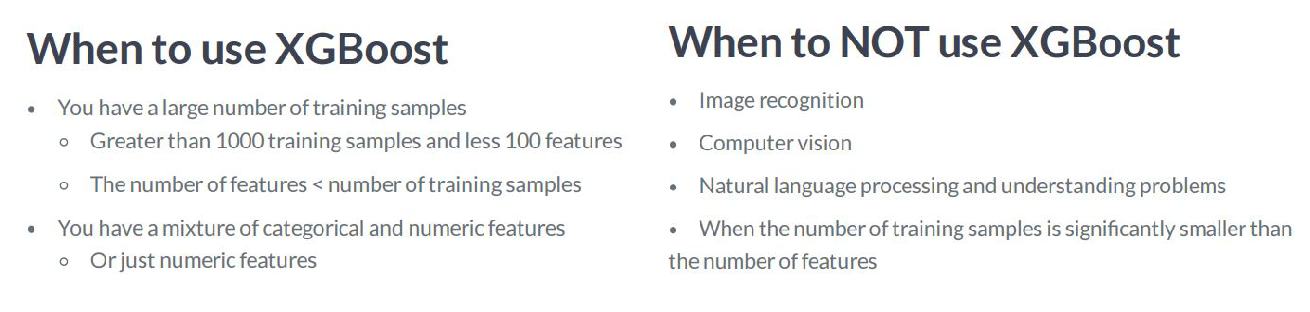

In [14]:
#vídeo

# When to use XGBoost
plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "when_xgb.jpg")
plt.axis('off')
plt.imshow(image)

# When not to use XGBoost
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "when_not_xgb.jpg")
plt.axis('off')
plt.imshow(image)

plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 12

In [15]:
print("Select the one which would be the best use of XGBoost.\n")
print("""Predicting the likelihood that a given user will click an ad from a very large clickstream log with millions of 
users and their web interactions.""")

Select the one which would be the best use of XGBoost.

Predicting the likelihood that a given user will click an ad from a very large clickstream log with millions of 
users and their web interactions.


# CHAPTER 2 - Regression with XGBoost

#### Exercício 1 - Regression review

In [16]:
#vídeo

Exercício 2

In [17]:
# Which of these is a regression problem?
print("""Predicting the expected payout of an auto insurance claim given claim properties (car, accident type, driver prior
history, etc.).""")

Predicting the expected payout of an auto insurance claim given claim properties (car, accident type, driver prior
history, etc.).


#### Exercício 3 - Objective (loss) functions and base learners

In [18]:
#vídeo

from sklearn.metrics import mean_squared_error

# boston_housing data set
boston_data = pd.read_csv(data_folder + "boston_housing.csv", header=-1)
X = boston_data.iloc[:, :-1]
y = boston_data.iloc[:, -1]

# Trees as base learners example: Scikit-learn API
print("Trees as base learners example: Scikit-learn API")

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

#######################################################################################################


# Linear base learners example: learning API only
print("\nLinear base learners example: learning API only")

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

params = {"booster":"gblinear", "objective":"reg:squarederror"}

xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)

preds = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

Trees as base learners example: Scikit-learn API
RMSE: 9.749041

Linear base learners example: learning API only
RMSE: 6.061921


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Exercício 4

In [19]:
# house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa
df = pd.read_csv(data_folder + "ames_housing_trimmed_processed.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [20]:
# Decision trees as base learners

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

#############

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, random_state=123)  # booster="gbtree" is default

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

print("""\nNext, you'll train an XGBoost model using linear base learners and XGBoost's learning API. 
Will it perform better or worse?""")

RMSE: 78847.401758

Next, you'll train an XGBoost model using linear base learners and XGBoost's learning API. 
Will it perform better or worse?


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Exercício 5

In [21]:
print("""Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with
XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear 
regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own 
non-scikit-learn compatible functions to build the model, such as xgb.train().

In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly
to how you created the dictionary in Chapter 1 when you used xgb.cv()). The key-value pair that defines the booster type 
(base model) you need is "booster":"gblinear".

Once you've created the model, you can use the .train() and .predict() methods of the model just like you've done in the 
past.""")

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with
XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear 
regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own 
non-scikit-learn compatible functions to build the model, such as xgb.train().

In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly
to how you created the dictionary in Chapter 1 when you used xgb.cv()). The key-value pair that defines the booster type 
(base model) you need is "booster":"gblinear".

Once you've created the model, you can use the .train() and .predict() methods of the model just like you've done in the 
past.


In [22]:
# Linear base learners

# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))
print("\nLinear base learners performed better.")

RMSE: 44331.645061

Linear base learners performed better.


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Exercício 6

In [23]:
# Evaluating model quality

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", 
                    as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print("\nRMSE: ", cv_results["test-rmse-mean"].tail(1))

####################################################################################

print("\n=====================================================================================================\n")

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", 
                    as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print("\nMAE (Mean Absolute error): ", cv_results["test-mae-mean"].tail(1))


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.488281      429.449371   142980.464844    1193.806011
1    102832.562500      322.503447   104891.398438    1223.161012
2     75872.621094      266.493573    79478.947266    1601.341377
3     57245.657226      273.633063    62411.919922    2220.151162
4     44401.291992      316.426590    51348.276367    2963.378029

RMSE:  4    51348.276367
Name: test-rmse-mean, dtype: float64


   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.595704     668.167771  127634.185547   2404.009753
1    89770.031250     456.980559   90122.505860   2107.916842
2    63580.782226     263.442189   64278.558594   1887.552548
3    45633.181641     151.849960   46819.175782   1459.821979
4    33587.097657      87.003217   35670.655274   1140.613227

MAE (Mean Absolute error):  4    35670.655274
Name: test-mae-mean, dtype: float64


#### Exercício 7 - Regularization and base learners in XGBoost

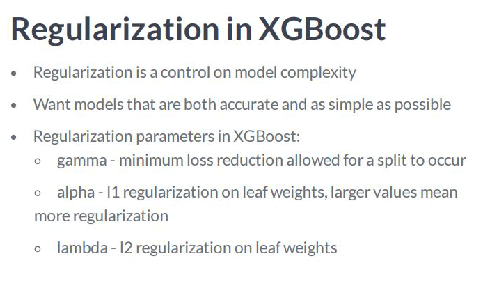

Best rmse as a function of l1:
    l1      rmse
0    1  3.461474
1   10  3.821152
2  100  4.645519


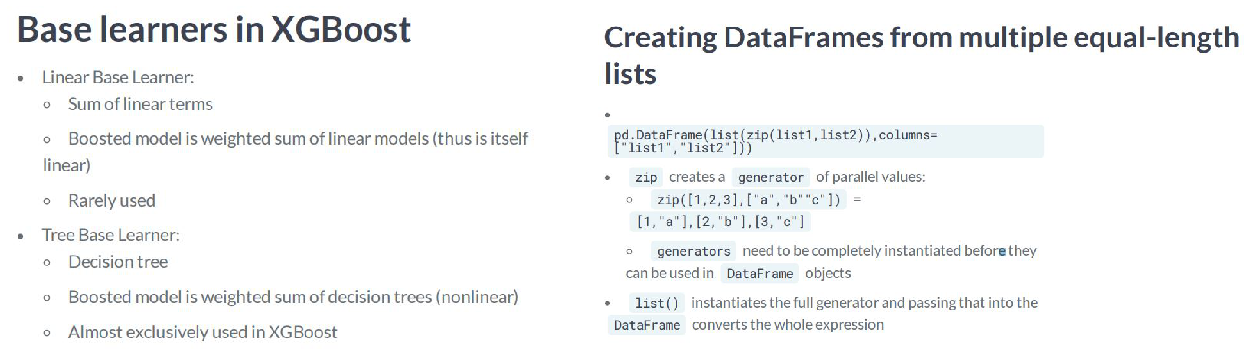

In [24]:
#vídeo

image = plt.imread(data_folder + "regularization.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.1, top=1, wspace=0, hspace=0.2)
plt.show()

X = boston_data.iloc[:, :-1]
y = boston_data.iloc[:, -1]

boston_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"reg:squarederror", "max_depth":4}

l1_params = [1,10,100]
rmses_l1 = []

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=boston_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="rmse",
                        as_pandas=True, seed=123)
    rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
    
print("Best rmse as a function of l1:")
print(pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"]))

#######

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "base_learners.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "creating_dfs.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 8

In [25]:
# Using regularization in XGBoost

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg  # l2 regularization is also known as "lambda"
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

print("\nIt looks like as as the value of 'lambda' increases, so does the RMSE.")

Best rmse as a function of l2:
    l2          rmse
0    1  52275.355469
1   10  57746.060547
2  100  76624.617188

It looks like as as the value of 'lambda' increases, so does the RMSE.


Exercício 9

In [26]:
%%script false
# Visualizing individual XGBoost trees

print("""XGBoost has a plot_tree() function that makes it easy visualizing  individual trees from the fully boosted model 
that XGBoost creates. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function
along with the number of trees you want to plot using the num_trees argument.\n""")

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)


# Plot the first tree using xgb.plot_tree(). It takes in two arguments - the model (in this case, xg_reg), and num_trees,
# which is 0-indexed. So to plot the first tree, specify num_trees=0.
xgb.plot_tree(xg_reg, num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")  # change the layout of the graph to be left to right (easier to read) by 
                                                  # changing the rankdir argument as ‘LR’ (left-to-right) rather than the 
                                                  # default top to bottom (UT)

plt.show() # n deu - ver abaixo exemplo

Couldn't find program: 'false'


In [27]:
print("""Each of the plots provide insight into how the model arrived at its final decisions and what splits it made to 
arrive at those decisions. This allows us to identify which features are the most important in determining house price. 
In the next exercise, you'll learn another way of visualizing feature importances.""")

Each of the plots provide insight into how the model arrived at its final decisions and what splits it made to 
arrive at those decisions. This allows us to identify which features are the most important in determining house price. 
In the next exercise, you'll learn another way of visualizing feature importances.


https://www.datacamp.com/community/tutorials/xgboost-in-python

Exercício 10

In [28]:
# Visualizing feature importances: What features are most important in my dataset

print("""Another way to visualize your XGBoost models is to examine the importance of each feature column in the original
dataset within the model. One simple way of doing this involves counting the number of times each feature is split on across
all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered 
according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.""")

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original
dataset within the model. One simple way of doing this involves counting the number of times each feature is split on across
all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered 
according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.


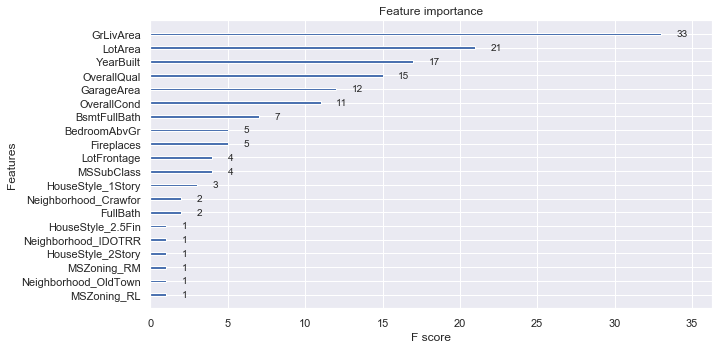

In [29]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {'objective':'reg:squarederror', 'max_depth':4}

# Train the model: xg_reg
xg_reg = xgb.train(dtrain=housing_dmatrix, params=params, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)

plt.subplots_adjust(left=0, bottom=0, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

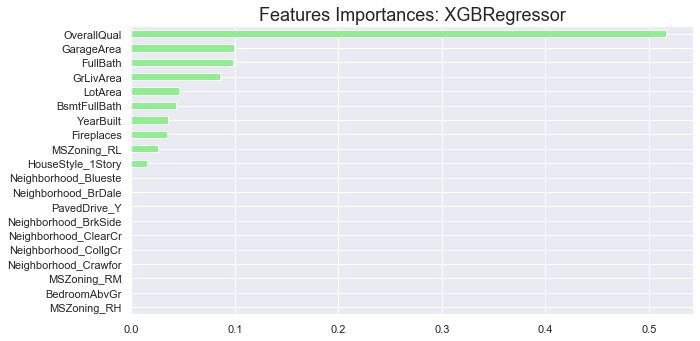

In [30]:
# Comparing with the model with decision trees as base learners (XGBRegressor) --> different performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, random_state=123) 
xg_reg.fit(X_train, y_train)

importances = pd.Series(data=xg_reg.feature_importances_, index=X.columns)

importances_sorted = importances.sort_values()

importances_sorted.tail(20).plot(kind='barh', color='lightgreen')
plt.title('Features Importances: {}'.format('XGBRegressor'), fontsize=18)
plt.subplots_adjust(left=0, bottom=0, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

# Chapter 3 - Fine-tuning your XGBoost model

#### Exercício 1 - Why tune your model?

In [31]:
#vídeo

Exercício 2

In [32]:
# When is tuning your model a bad idea?

# Answer: You are very short on time before you must push an initial model to production and have little data to train your 
# model on.

Exercício 3

In [33]:
# Tuning the number of boosting rounds

df = pd.read_csv(data_folder + "ames_housing_trimmed_processed.csv")
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
################################

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, 
                        metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

print("\nIncreasing the number of boosting rounds decreases the RMSE. (considering 5, 10 and 15)")

   num_boosting_rounds          rmse
0                    5  50903.299479
1                   10  34774.191406
2                   15  32895.098307

Increasing the number of boosting rounds decreases the RMSE. (considering 5, 10 and 15)


Exercício 4

 - **Automated boosting round selection using early_stopping**

Now, instead of attempting to cherry pick the best possible number of boosting rounds, you can very easily have
XGBoost automatically select the number of boosting rounds for you within xgb.cv(). This is done using a technique called 
*early stopping.*

Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the
creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in
our case) does not improve for a given number of rounds. Here you will use the *early_stopping_rounds parameter* in xgb.cv()
with a large possible number of boosting rounds (50). Bear in mind that if the holdout metric continuously improves up
through when num_boosting_rounds is reached, then early stopping does not occur.

In [34]:
# Automated boosting round selection using early_stopping

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, metrics="rmse", early_stopping_rounds=10, 
                    num_boost_round=50, seed=123, as_pandas=True)

# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.630208      403.632409   142640.630208     705.552907
1     103057.033855       73.787612   104907.677083     111.124997
2      75975.958334      253.705643    79262.057292     563.761707
3      57420.515625      521.666323    61620.138021    1087.681933
4      44552.960938      544.168971    50437.558594    1846.450522
5      35763.942708      681.796885    43035.660157    2034.476339
6      29861.469401      769.567549    38600.881511    2169.803563
7      25994.679036      756.524834    36071.816407    2109.801581
8      23306.832031      759.237670    34383.183594    1934.542189
9      21459.772787      745.623840    33509.141927    1887.374588
10     20148.728516      749.612756    32916.806641    1850.890045
11     19215.382162      641.387202    32197.834635    1734.459068
12     18627.391276      716.256398    31770.848958    1802.156167
13     17960.697265      557.046469    31482.781901    1779.12

#### Exercício 5 - Overview of XGBoost's hyperparameters

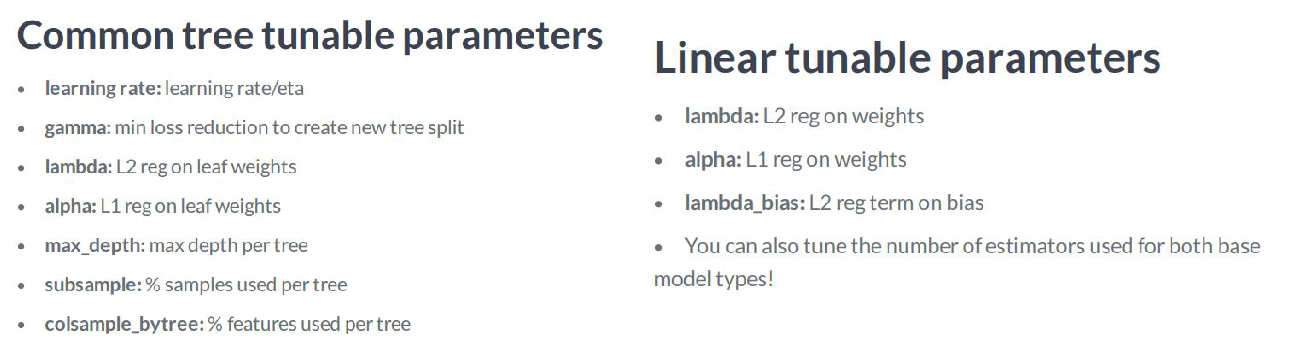

In [35]:
#vídeo

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "common_hyp.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "linear_hyp.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 6

In [36]:
# Tuning eta / learning rate

# The learning rate in XGBoost is a parameter that can range between 0 and 1, with higher values of "eta" penalizing 
# feature weights more strongly, causing much stronger regularization.

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, metrics="rmse", early_stopping_rounds=5, nfold=3,
                        num_boost_round=10, seed=123, as_pandas=True)
       
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"]))


     eta      best_rmse
0  0.001  195736.406250
1  0.010  179932.161458
2  0.100   79759.401042


Exercício 7

In [37]:
# Tuning max_depth

# max_depth,the parameter that dictates the maximum depth that each tree in a boosting round can grow to. 
# Smaller values will lead to shallower trees, and larger values to deeper trees.

# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 5, 10, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, metrics="rmse", early_stopping_rounds=5, nfold=2,
                        num_boost_round=10, seed=123, as_pandas=True)
                        
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]))


   max_depth     best_rmse
0          2  37957.476562
1          5  35596.599610
2         10  36065.537110
3         20  36739.574219


Exercício 8

In [38]:
# Tuning colsample_bytree

# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror", "max_depth":3}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.8, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))


   colsample_bytree     best_rmse
0               0.1  40918.113281
1               0.5  35813.910157
2               0.8  35995.685547
3               1.0  35836.042969


#### Exercício 9 - Review of grid search and random search

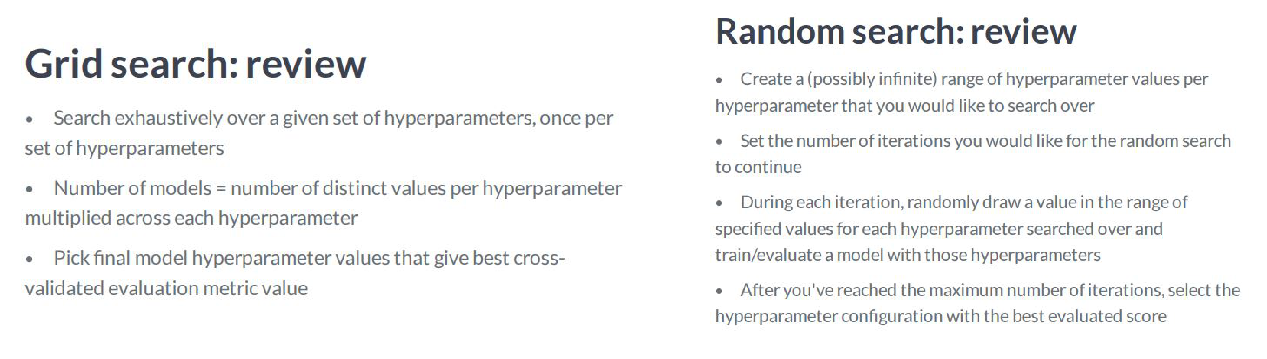

In [39]:
#vídeo

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "grid_search.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "random_search.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 10

In [40]:
# Grid search with XGBoost

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import GridSearchCV

# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {'colsample_bytree': [0.3, 0.7],
                  'n_estimators': [50],
                  'max_depth': [2, 5],
                 'objective':["reg:squarederror"]}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring="neg_mean_squared_error", cv=4, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.6s finished


Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50, 'objective': 'reg:squarederror'}
Lowest RMSE found:  29307.853447661928


Exercício 11

In [41]:
# Random search with XGBoost

from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {'n_estimators': [25], 
                  'max_depth': range(2, 12),
                 'objective':["reg:squarederror"]}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, scoring="neg_mean_squared_error", 
                                    n_iter=5, cv=4, verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X, y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))


Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.8s finished


Best parameters found:  {'objective': 'reg:squarederror', 'n_estimators': 25, 'max_depth': 5}
Lowest RMSE found:  36636.35808132903


#### Exercício 12 - Limits of grid search and random search

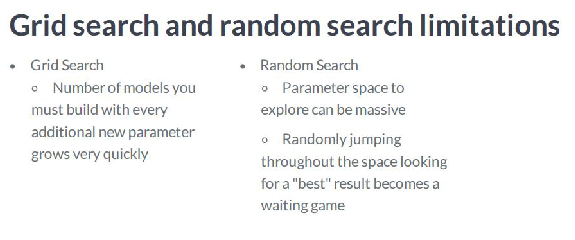

In [42]:
#vídeo

image = plt.imread(data_folder + "grid_search_limitations.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 13

In [43]:
# When should you use grid search and random search?

print("""The search space size can be massive for Grid Search in certain cases, whereas for Random Search the number of 
hyperparameters has a significant effect on how long it takes to run.""")

The search space size can be massive for Grid Search in certain cases, whereas for Random Search the number of 
hyperparameters has a significant effect on how long it takes to run.


# Chapter 4 - Using XGBoost in pipelines

#### Exercício 1 - Review of pipelines using sklearn

Final RMSE: 4.307749219472685
(Note: 'neg_mean_squared_error' is sklearn's way of calculating the mean squared error in an API compatible way. 
Negative mean squared error don't actually exist.)



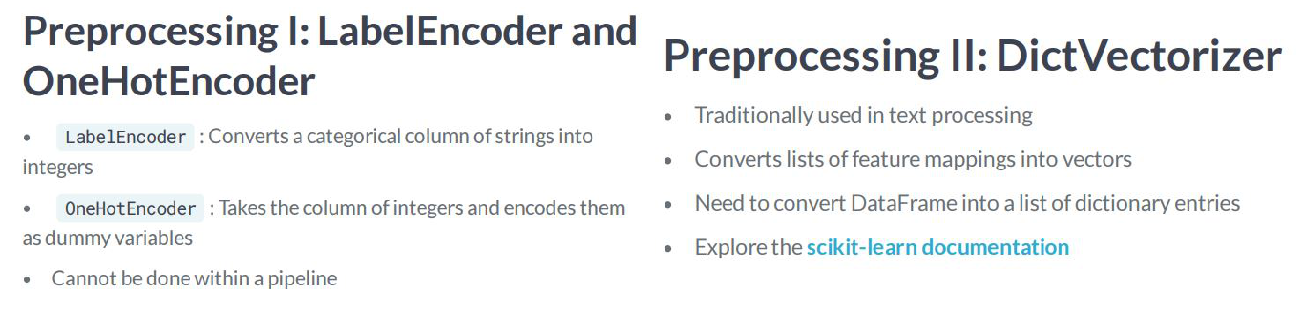

In [44]:
#vídeo

# Scikit-learn pipeline example
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

names = ["crime", "zone", "industry", "charles", "no", "rooms", "age", "distance", "radial", "tax", "pupil", "aam",
         "lower","med_price"]

data = pd.read_csv(data_folder + "boston_housing.csv", names=names)

X, y = data.iloc[:,:-1], data.iloc[:,-1]

steps = Pipeline([("st_scaler", StandardScaler()), ("rf_model", RandomForestRegressor())])

scores = cross_val_score(steps, X, y, scoring="neg_mean_squared_error", cv=10)

final_avg_rmse = np.mean(np.sqrt(np.abs(scores)))

print("Final RMSE:", final_avg_rmse)
print("""(Note: 'neg_mean_squared_error' is sklearn's way of calculating the mean squared error in an API compatible way. 
Negative mean squared error don't actually exist.)""")

print("\n=======================================================================================================")
#########################################################

plt.subplot(1, 2, 1)
image = plt.imread(data_folder + "preprocessing_1.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplot(1, 2, 2)
image = plt.imread(data_folder + "preprocessing_2.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 2

In [45]:
# Exploratory data analysis

# unprocessed Ames housing dataset.
df = pd.read_csv(data_folder + "ames_unprocessed_data.csv")

# Incorrect option
#  - The LotFrontage column has no missing values   - wrong

# true
print(df.shape) # 21 columns and 1460 rows
print(df['LotArea'].mean()) # mean is 10516.82
print(df['SalePrice'].std(), "\n") # std is 79442.50
print(df.info())  # has missing values

df.head()

(1460, 21)
10516.828082191782
79442.50288288663 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
Remodeled       1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
BedroomAbvGr    1460 non-null int64
Fireplaces      1460 non-null int64
GarageArea      1460 non-null int64
PavedDrive      1460 non-null object
SalePrice       1460 non-null int64
dtypes: float64(1), int64(15), object(5)
memory usage: 239.6+ KB
None


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


Exercício 3

In [46]:
# with pd.get_dummies
df = pd.read_csv(data_folder + "ames_unprocessed_data.csv")
pd.get_dummies(df).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,0,1
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,0,1
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,0,1


In [47]:
# Encoding categorical columns I: LabelEncoder

df = pd.read_csv(data_folder + "ames_unprocessed_data.csv")
#############

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()
print("Categorical columns: {}\n".format(categorical_columns))

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
df[categorical_columns].head()

Categorical columns: ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'PavedDrive']

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y


,MSZoning,Neighborhood,BldgType,HouseStyle,PavedDrive
0,3,5,0,5,2
1,3,24,0,2,2
2,3,5,0,5,2
3,3,6,0,5,2
4,3,15,0,5,2


Exercício 4

In [48]:
# Encoding categorical columns II: OneHotEncoder

# Okay - so you have your categorical columns encoded numerically. Can you now move onto using pipelines and XGBoost? 
# Not yet. In the categorical columns of this dataset, there is no natural ordering between the entries. As an example:
# Using LabelEncoder, the CollgCr Neighborhood was encoded as 5, while the Veenker Neighborhood was encoded as 24, and 
# Crawfor as 6. Is Veenker "greater" than Crawfor and CollgCr? No - and allowing the model to assume this natural ordering 
# may result in poor performance.

# As a result, there is another step needed: You have to apply a one-hot encoding to create binary, or "dummy" variables.
# You can do this using scikit-learn's OneHotEncoder.

# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
print("Apply OneHotEncoder to categorical columns - output is no longer a dataframe. First 3 rows of resulting dataset:\n")
df_encoded = ohe.fit_transform(df)

# Print first 3 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:3, :], "\n")

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)


Apply OneHotEncoder to categorical columns - output is no longer a dataframe. First 3 rows of resulting dataset:

[[0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+01 6.500e+01 8.450e+03
  7.000e+00 5.000e+00 2.003e+03 0.000e+00 1.710e+03 1.000e+00 0.000e+00
  2.000e+00 1.000e+00 3.000e+00 0.000e+00 5.480e+02 2.085e+05]
 [0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Exercício 5

In [49]:
# Encoding categorical columns III: DictVectorizer

# The two step process you just went through - LabelEncoder followed by OneHotEncoder - can be simplified by using a 
# DictVectorizer. Using a DictVectorizer on a DataFrame that has been converted to a dictionary allows you to get label
# encoding as well as one-hot encoding in one go.

# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict(orient='records')  # 'records': list like [{column -> value}, … , {column -> value}]

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first 3 rows
print(df_encoded[:3, :], "\n")

# Print the vocabulary
print(dv.vocabulary_)

print("""\nBesides simplifying the process into one step, DictVectorizer has useful attributes such as vocabulary_ which
maps the names of the features to their indices. With the data preprocessed, it's time to move onto pipelines.""")

[[3.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 5.480e+02
  1.710e+03 1.000e+00 5.000e+00 8.450e+03 6.500e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 2.000e+00 4.600e+02
  1.262e+03 0.000e+00 2.000e+00 9.600e+03 8.000e+01 2.000e+01 3.000e+00
  2.400e+01 8.000e+00 6.000e+00 2.000e+00 0.000e+00 1.815e+05 1.976e+03]
 [3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.000e+00 2.000e+00 6.080e+02
  1.786e+03 1.000e+00 5.000e+00 1.125e+04 6.800e+01 6.000e+01 3.000e+00
  5.000e+00 5.000e+00 7.000e+00 2.000e+00 1.000e+00 2.235e+05 2.001e+03]] 

{'MSSubClass': 12, 'MSZoning': 13, 'LotFrontage': 11, 'LotArea': 10, 'Neighborhood': 14, 'BldgType': 1, 'HouseStyle': 9, 'OverallQual': 16, 'OverallCond': 15, 'YearBuilt': 20, 'Remodeled': 18, 'GrLivArea': 7, 'BsmtFullBath': 2, 'BsmtHalfBath': 3, 'FullBath': 5, 'HalfBath': 8, 'BedroomAbvGr': 0, 'Fireplaces': 4, 'GarageArea': 6, 'PavedDrive': 17

Exercício 6

In [50]:
# Preprocessing within a pipeline

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
####

# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'), y)


[21:14:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ohe_onestep',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

#### Exercício 7 - Incorporating XGBoost into pipelines

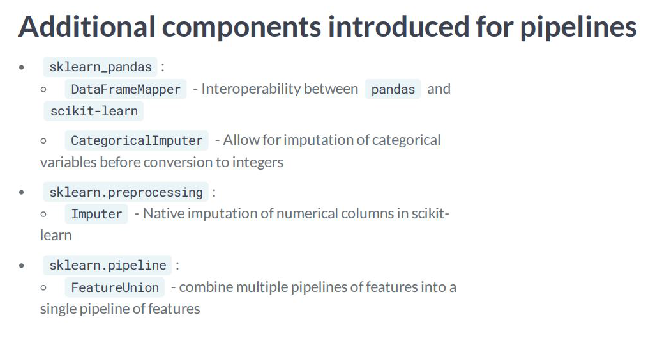

In [51]:
#vídeo

image = plt.imread(data_folder + "additional_pipeline.jpg")
plt.axis('off')
plt.imshow(image)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.5, top=1, wspace=0, hspace=0.2)
plt.show()

Exercício 8

In [52]:
# Cross-validating your XGBoost model

# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline, X.to_dict("records"), y, cv=10, scoring='neg_mean_squared_error')

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  30343.486551766466


Exercício 9

In [53]:
# Kidney disease case study I: Categorical Imputer

# You'll now continue your exploration of using pipelines with a dataset that requires significantly more wrangling. 

kidney = pd.read_csv(data_folder + "chronic_kidney_disease.csv", header=-1)

kidney_feature_names = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc',
                        'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
kidney.columns = kidney_feature_names
kidney['class'] = kidney['class'].replace('ckd', 0).replace('notckd', 1)
X = kidney.drop('class', axis=1)
y = np.array(kidney['class'])
##################################################################
kidney.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,0
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,0
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,0
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,0
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,0


You'll be introduced to a new library, **sklearn_pandas**, that allows you to 
chain many more processing steps inside of a pipeline than are currently supported in scikit-learn. Specifically, you'll
be able to *impute missing categorical values* *directly* using the **Categorical_Imputer()** class in sklearn_pandas, and the **DataFrameMapper()** class to *apply any arbitrary sklearn-compatible transformer on DataFrame columns, where the resulting output can be either a NumPy array or DataFrame.*

We've also created a transformer called a **Dictifier** that *encapsulates converting a DataFrame using .to_dict("records")*
without you having to do it explicitly (and so that it works in a pipeline). Finally, we've also provided the list of 
feature names in kidney_feature_names, the target name in kidney_target_name, the features in X, and the target in y.

In this exercise, your task is to apply the CategoricalImputer to impute all of the categorical columns in the dataset.
You can refer to how the numeric imputation mapper was created as a template. Notice the keyword arguments input_df=True
and df_out=True? This is so that you can work with DataFrames instead of arrays. By default, the transformers are passed 
a numpy array of the selected columns as input, and as a result, the output of the DataFrame mapper is also an array. 
Scikit-learn transformers have historically been designed to work with numpy arrays, not pandas DataFrames, even though 
their basic indexing interfaces are similar.

In [54]:
# Import necessary modules
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer

# Check number of nulls in each feature column
nulls_per_column = X.isnull().sum()
print('nulls_per_column\n', nulls_per_column)

# Create a boolean mask for categorical columns
categorical_feature_mask = X.dtypes == object

# Get list of categorical column names
categorical_columns = X.columns[categorical_feature_mask].tolist()

# Get list of non-categorical column names
non_categorical_columns = X.columns[~categorical_feature_mask].tolist()

# Apply numeric imputer
numeric_imputation_mapper = DataFrameMapper(
    [([numeric_feature], Imputer(strategy="median")) for numeric_feature in non_categorical_columns],
                                            input_df=True,
                                            df_out=True
                                           )

# Apply categorical imputer
categorical_imputation_mapper = DataFrameMapper(
    [(category_feature, CategoricalImputer()) for category_feature in categorical_columns],
                                            input_df=True,
                                            df_out=True
                                                )

nulls_per_column
 age      0
bp       0
sg       0
al       0
su       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


Exercício 10

In [55]:
# Kidney disease case study II: Feature Union

# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])


Exercício 11

In [56]:
# Kidney disease case study III: Full pipeline

# piece together all of the transforms along with an XGBClassifier to build the full pipeline

# Create full pipeline
pipeline = Pipeline([
#                      ("featureunion", numeric_categorical_union),
#                      ("dictifier", Dictifier()),
                     ("vectorizer", DictVectorizer(sort=False)),
                     ("clf", xgb.XGBClassifier(max_depth=3))
                    ])

# Perform cross-validation
cross_val_scores = cross_val_score(pipeline, X.to_dict("records"), y, scoring="roc_auc", cv=3)

# Print avg. AUC
print("3-fold AUC: ", np.mean(cross_val_scores))

# nota: "featureunion" e "dictifier" n funcionaram

3-fold AUC:  0.9973350545037292


#### Exercício 12 - Tuning XGBoost hyperparameters

In [57]:
#vídeo

Exercício 13

In [58]:
# Bringing it all together

# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
                }

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline, param_distributions=gbm_param_grid, 
                                        cv=2, n_iter=2, scoring='roc_auc', verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X.to_dict("records"), y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s finished


0.9873866666666666
{'clf__n_estimators': 150, 'clf__max_depth': 6, 'clf__learning_rate': 0.7500000000000001}


#### Exercício 14 - end

In [59]:
#vídeo

# What We Have Not Covered (And How You Can Proceed)

# - Using XGBoost for ranking/recommendation problems (Netix/Amazon problem)
#  - Using more sophisticated hyperparameter tuning strategies for tuning XGBoost models (Bayesian Optimization)
#  - Using XGBoost as part of an ensemble of other models for regression/classication


# Fim